In [14]:
import numpy as np
import pandas as pd
from arch import arch_model
from sklearn.model_selection import train_test_split

# Load data
data = pd.read_csv('DATA/raw/spx.csv')
data['returns'] = 100 * data['Close'].pct_change().dropna()  # Multiply by 100 for better scaling


<h3> GARCH Volatility Forecasting </h3>
This python notebook will be using GARCH Model to forecast the volatility of SPX.


<h4> 1.0 Preparing data and importing necessary packages </h4>
Below is the code chunk where we import all the necessary packages such as garch model, and data 

In [31]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from src.data_handling import load_csv_data, filter_data_by_year_range, save_to_csv

DATA_PATH = "DATA/processed/df.csv"
df = load_csv_data(DATA_PATH)
df.head()

,AAPL_Open,AAPL_High,AAPL_Low,AAPL_Close,AAPL_Adj Close,AAPL_Volume,AMZN_Open,AMZN_High,AMZN_Low,AMZN_Close,AMZN_Adj Close,AMZN_Volume,MSFT_Open,MSFT_High,MSFT_Low,MSFT_Close,MSFT_Adj Close,MSFT_Volume,SPX_Open,SPX_High,SPX_Low,SPX_Close,SPX_Adj Close,SPX_Volume,VIX_Open,VIX_High,VIX_Low,VIX_Close,VIX_Adj Close,IRX_Open,IRX_High,IRX_Low,IRX_Close,IRX_Adj Close
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.531765,212818400.0,15.6290,15.7375,15.3480,15.4260,15.4260,55664000.0,46.660000,47.419998,46.540001,46.759998,40.620663,27913900.0,2058.899902,2072.360107,2046.040039,2058.199951,2058.199951,2.708700e+09,17.760000,20.139999,17.049999,17.790001,17.790001,0.030,0.030,0.015,0.015,0.015
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.840672,257142000.0,15.3505,15.4190,15.0425,15.1095,15.1095,55484000.0,46.369999,46.730000,46.250000,46.330002,40.247116,39673900.0,2054.439941,2054.439941,2017.339966,2020.579956,2020.579956,3.799120e+09,19.190001,21.290001,19.190001,19.920000,19.920000,0.008,0.018,0.003,0.003,0.003
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.842909,263188400.0,15.1120,15.1500,14.6190,14.7645,14.7645,70380000.0,46.380001,46.750000,45.540001,45.650002,39.656410,36447900.0,2022.150024,2030.250000,1992.439941,2002.609985,2002.609985,4.460110e+09,20.330000,22.900000,19.520000,21.120001,21.120001,0.023,0.023,0.018,0.020,0.020
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.177242,160423600.0,14.8750,15.0640,14.7665,14.9210,14.9210,52806000.0,45.980000,46.459999,45.490002,46.230000,40.160259,29114100.0,2005.550049,2029.609985,2005.550049,2025.900024,2025.900024,3.805480e+09,20.150000,20.719999,19.040001,19.309999,19.309999,0.023,0.025,0.020,0.020,0.020
2015-01-08,27.307501,28.037500,27.174999,27.972500,25.106180,237458000.0,15.0160,15.1570,14.8055,15.0230,15.0230,61768000.0,46.750000,47.750000,46.720001,47.590000,41.341690,29645200.0,2030.609985,2064.080078,2030.609985,2062.139893,2062.139893,3.934010e+09,17.930000,18.090000,16.990000,17.010000,17.010000,0.020,0.020,0.015,0.018,0.018


<h4> 1.1 Filtering data by date </h4>

We will be modelling with GARCH using the data from 2015 and onwards, as market dynamics prior is no longer relevant

In [25]:
MODELING_YEARS = (2015, 2025)

df = filter_data_by_year_range(df, *MODELING_YEARS)
df.head()

,AAPL_Open,AAPL_High,AAPL_Low,AAPL_Close,AAPL_Adj Close,AAPL_Volume,AMZN_Open,AMZN_High,AMZN_Low,AMZN_Close,AMZN_Adj Close,AMZN_Volume,MSFT_Open,MSFT_High,MSFT_Low,MSFT_Close,MSFT_Adj Close,MSFT_Volume,SPX_Open,SPX_High,SPX_Low,SPX_Close,SPX_Adj Close,SPX_Volume,VIX_Open,VIX_High,VIX_Low,VIX_Close,VIX_Adj Close,IRX_Open,IRX_High,IRX_Low,IRX_Close,IRX_Adj Close,Year
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.531765,212818400.0,15.6290,15.7375,15.3480,15.4260,15.4260,55664000.0,46.660000,47.419998,46.540001,46.759998,40.620663,27913900.0,2058.899902,2072.360107,2046.040039,2058.199951,2058.199951,2.708700e+09,17.760000,20.139999,17.049999,17.790001,17.790001,0.030,0.030,0.015,0.015,0.015,2015
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.840672,257142000.0,15.3505,15.4190,15.0425,15.1095,15.1095,55484000.0,46.369999,46.730000,46.250000,46.330002,40.247116,39673900.0,2054.439941,2054.439941,2017.339966,2020.579956,2020.579956,3.799120e+09,19.190001,21.290001,19.190001,19.920000,19.920000,0.008,0.018,0.003,0.003,0.003,2015
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.842909,263188400.0,15.1120,15.1500,14.6190,14.7645,14.7645,70380000.0,46.380001,46.750000,45.540001,45.650002,39.656410,36447900.0,2022.150024,2030.250000,1992.439941,2002.609985,2002.609985,4.460110e+09,20.330000,22.900000,19.520000,21.120001,21.120001,0.023,0.023,0.018,0.020,0.020,2015
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.177242,160423600.0,14.8750,15.0640,14.7665,14.9210,14.9210,52806000.0,45.980000,46.459999,45.490002,46.230000,40.160259,29114100.0,2005.550049,2029.609985,2005.550049,2025.900024,2025.900024,3.805480e+09,20.150000,20.719999,19.040001,19.309999,19.309999,0.023,0.025,0.020,0.020,0.020,2015
2015-01-08,27.307501,28.037500,27.174999,27.972500,25.106180,237458000.0,15.0160,15.1570,14.8055,15.0230,15.0230,61768000.0,46.750000,47.750000,46.720001,47.590000,41.341690,29645200.0,2030.609985,2064.080078,2030.609985,2062.139893,2062.139893,3.934010e+09,17.930000,18.090000,16.990000,17.010000,17.010000,0.020,0.020,0.015,0.018,0.018,2015


<h4> 2.0 Analysing returns </h4>


Text(0.5, 1.0, 'SPX Returns')

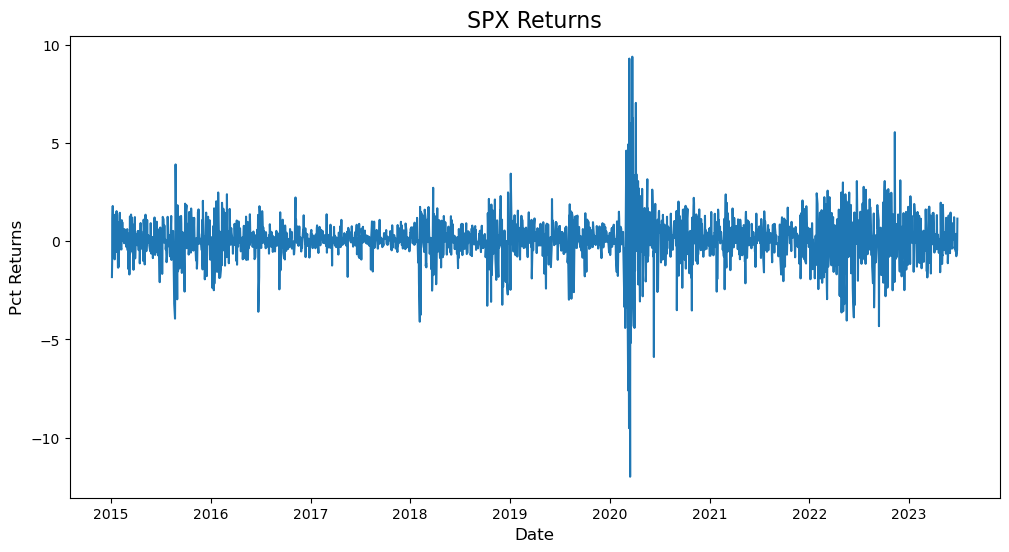

In [30]:
# Comptuing returns
returns = 100 * df["SPX_Close"].pct_change().dropna()

# Visualising returns
plt.figure(figsize=(12,6))
plt.plot(returns)
plt.xlabel("Date", fontsize = 12)
plt.ylabel("Pct Returns", fontsize = 12)
plt.title("SPX Returns", fontsize=16)

<h4> 2.1 Partial Auto-Correlation Function (PACF) </h4>

Visually analysing the autocorrelation

c:\Users\bruce\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


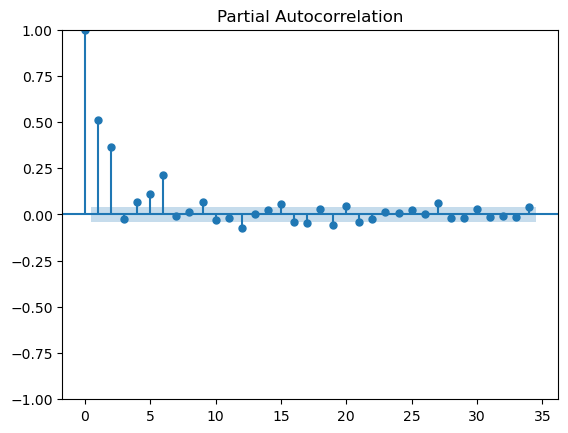

In [33]:
plot_pacf(returns ** 2)
plt.show()

<h4> 3.0 GARCH(2,2) </h4>

From the graph plot above, we can see that 2 lags are pretty significant, hence in the following code chunk we will be initialising GARCH(2,2)

In [35]:
# Initialising model
model = arch_model(returns, p=2, q=2)

# Fitting model
model_fit = model.fit()

# Review coefficients and summary
model_fit.summary()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 15099.14183180016
Iteration:      2,   Func. Count:     20,   Neg. LLF: 11078.008298652283
Iteration:      3,   Func. Count:     31,   Neg. LLF: 3840.4883125253436
Iteration:      4,   Func. Count:     39,   Neg. LLF: 4767.590733606536
Iteration:      5,   Func. Count:     48,   Neg. LLF: 3676.4822350265367
Iteration:      6,   Func. Count:     57,   Neg. LLF: 2810.771884318634
Iteration:      7,   Func. Count:     65,   Neg. LLF: 2811.6630417790966
Iteration:      8,   Func. Count:     73,   Neg. LLF: 2810.3948458418627
Iteration:      9,   Func. Count:     80,   Neg. LLF: 2813.04539512237
Iteration:     10,   Func. Count:     89,   Neg. LLF: 2810.371545847538
Iteration:     11,   Func. Count:     96,   Neg. LLF: 2810.3680224129607
Iteration:     12,   Func. Count:    103,   Neg. LLF: 2810.367753330501
Iteration:     13,   Func. Count:    110,   Neg. LLF: 2810.3677521988493
Iteration:     14,   Func. Count:    116,   Neg. LLF: 2810

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:              SPX_Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2810.37
Distribution:                  Normal   AIC:                           5632.74
Method:            Maximum Likelihood   BIC:                           5666.95
                                        No. Observations:                 2212
Date:                Thu, Aug 03 2023   Df Residuals:                     2211
Time:                        21:51:05   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0857  1.533e-02      5.591  2.252e-08 [5.565e-02,  0.116]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.0371  3.959e-02      0.938      0.348 [-4.044e-02,  0.115]
alpha[1]       0.2295  5.310e-02      4.322  1.547e-05    [  0.125,  0.334]
alpha[2]   4.3939e-18      0.245  1.796e-17      1.000    [ -0.480,  0.480]
beta[1]        0.6664      0.930      0.717      0.473    [ -1.156,  2.489]
beta[2]        0.0843      0.687      0.123      0.902    [ -1.262,  1.430]
===========================================================================

Covariance estimator: robust
"""

<h4> 4.0 Rolling Forecast Prediction </h4>

From the model summary above, we can see that the coefficients for $alpha_2$ and $beta_2$ are extremely small, 4.39e-18 and 0.084 respectively. Their respective significance of 1.55e-05, 1.00, 0.473 and 0.902. This means that the coefficients of $alpha_2$ and $beta_2$ are insignificant, hence we can use GARCH(1, 1) instead.

This brings a few advantages:
- **Parsimony:** A simpler model reduces the risk of overfitting, making it potentially more robust for out-of-sample forecasting.
- **interpretability:** A GARCH(1,1) model is easier to understand and interpret than higher-order GARCH models.
- **Efficiency:** Fewer parameters means faster estimation times and fewer opportunities for estimation issues.

<h4> 4.1 Initialising constants and lists </h4>

In [39]:
rolling_predictions =[]
TEST_SIZE = 365*5

<h4> 4.2 Defining function for rolling forecast </h4>

In [44]:
def rolling_garch_forecast(returns, p=1, q=1, forecast_horizon=1, training_window_years=5, days_per_year=365):
    """
    Generate rolling forecasts using the GARCH(1,1) model on a series of returns.

    Parameters:
    - returns (array-like): The series of returns.
    - forecast_horizon (int): The forecast horizon, default is 1-day ahead.
    - training_window_years (int): Number of years for the rolling training window, default is 5 years.
    - days_per_year (int): Number of days in a year, default is 365.

    Returns:
    - List of forecasted volatilities.
    """
    
    # Initialize the list to store the rolling forecasts
    rolling_predictions = []
    
    # Calculate the size of the test dataset
    test_size = days_per_year * training_window_years
    
    # Loop through each day in the test dataset
    for i in range(test_size):
        # Define the training dataset using a rolling window approach
        train = returns[:-(test_size-i)]
        
        # Define the GARCH(1,1) model
        model = arch_model(train, p=p, q=q)
        
        # Fit the model to the training data
        model_fit = model.fit(disp='off')
        
        # Generate the forecast
        pred = model_fit.forecast(horizon=forecast_horizon, reindex=False)
        
        # Extract the forecasted volatility and append to the results list
        forecasted_volatility = np.sqrt(pred.variance.values[-1,:][0])
        rolling_predictions.append(forecasted_volatility)
    
    return rolling_predictions


<h4> 4.3 Forecasting predictions </h4>

ValueError: If using all scalar values, you must pass an index

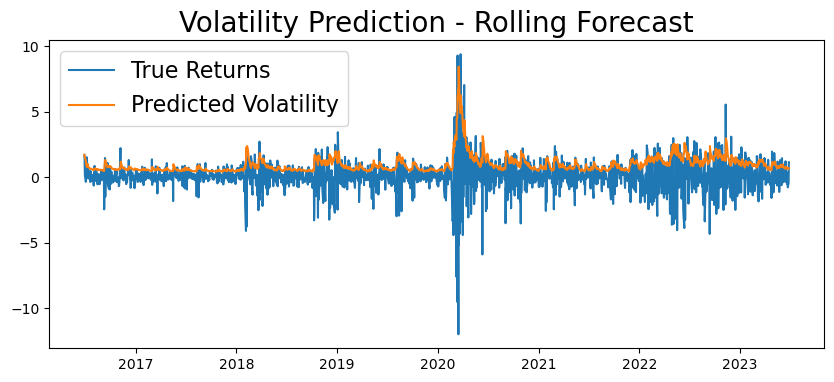

In [49]:
rolling_predictions = rolling_garch_forecast(returns, p=1, q=1)
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365*5:])

# Visualising rolling predictions
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365*5:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)


<h4> 4.4 Analysing error </h4>


In [60]:
# Analysing differences
analysis = {'Mean Absolute Error (MAE)': [np.mean(np.abs(returns[-365*5:] - rolling_predictions))],
            "Mean Squared Error (MSE)": [np.mean((returns[-365*5:] - rolling_predictions)**2)]}

analysis_df = pd.DataFrame.from_dict(analysis).T
analysis_df.columns = [""]
display(analysis_df)


,
Mean Absolute Error (MAE),1.071053
Mean Squared Error (MSE),2.689117
